<a href="https://colab.research.google.com/github/marshallexperiment/personal-AI-journey/blob/main/Tugas_statistika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Naive Bayes Statistika

## Oleh Marshall Al Karim
## NIM: 2222038

Naive Bayes adalah teknik klasifikasi statistik berdasarkan Teorema Bayes. Ini adalah salah satu algoritma pembelajaran terawasi yang paling sederhana. Klasifikasi Naive Bayes adalah algoritma yang cepat, akurat, dan dapat diandalkan. Klasifikasi Naive Bayes memiliki akurasi dan kecepatan tinggi pada kumpulan data besar.

Klasifikasi Naive Bayes mengasumsikan bahwa efek fitur tertentu dalam sebuah kelas independen dari fitur lainnya. Misalnya, seorang calon peminjam dianggap layak atau tidak tergantung pada pendapatannya, riwayat pinjaman dan transaksi sebelumnya, usia, dan lokasi. Meskipun fitur-fitur ini saling terkait, fitur-fitur ini masih dianggap independen. Asumsi ini menyederhanakan perhitungan, dan itulah sebabnya dianggap sebagai naive. Asumsi ini disebut independensi kondisional kelas.

$$ P(h | D) = \frac{{P(D | h) \times P(h)}}{{P(D)}} $$

$ P(h) $ = Probabilitas hipotesis h menjadi benar (tanpa memperhitungkan data). Ini dikenal sebagai probabilitas sebelumnya (prior probability) dari $h$.

$ P (D) $ = Probabilitas dari data (tanpa memperhitungkan hipotesis). Ini dikenal sebagai probabilitas sebelumnya.

$ P(h | D) $ = Probabilitas hipotesis $h$ diberikan data $D$ Ini dikenal sebagai probabilitas posterior.

$ P(D | h) $ = Probabilitas data $D$ diberikan bahwa hipotesis $h$ benar. Ini dikenal sebagai probabilitas posterior.









Mengambil Library yang dibutuhkan

In [56]:
import pandas as pd
import numpy as np


Mengambil data dari google drive saya. Sumber data: https://www.kaggle.com/datasets/itssuru/loan-data

In [57]:
path = "/content/drive/MyDrive/dataset/loan_data.csv" # Data yang saya taruh di Drive
df = pd.read_csv(path)
df.head() # 5 data teratas

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### Eksplorasi Data.
Untuk memahami lebih lanjut tentang dataset, kita akan menggunakan .info().

Dataset ini terdiri dari 14 kolom dan 9578 baris.

Selain dari kolom "purpose", kolom-kolom lainnya berupa float atau integer.

Kolom target kita adalah "not.fully.paid" sebagai **kelas**








In [58]:
df.info() #Jumlah column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


Terdapat 14 Baris Data dari metode **info()**


Di contoh ini, kita akan mengembangkan model untuk memprediksi pelanggan yang belum sepenuhnya melunasi pinjaman (dalam sintaks: *not*.fully.paid). Mari jelajahi tujuan dan kolom target dengan menggunakan countplot dari seaborn.




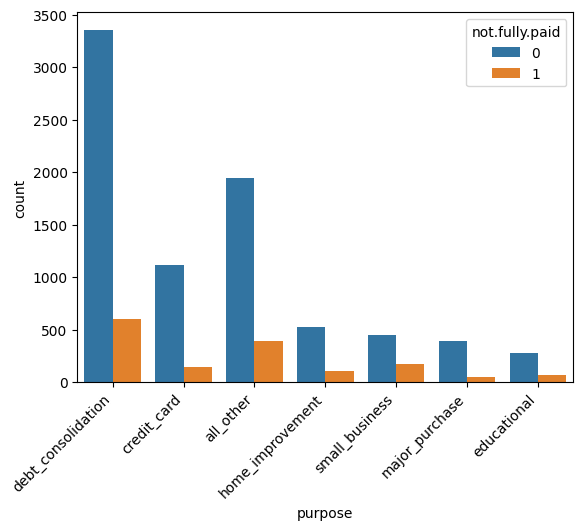

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df,x='purpose',hue='not.fully.paid')
plt.xticks(rotation=45, ha='right');

<ipython-input-60-0fc550218ba4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fully_paid, x='purpose', palette='Set1')


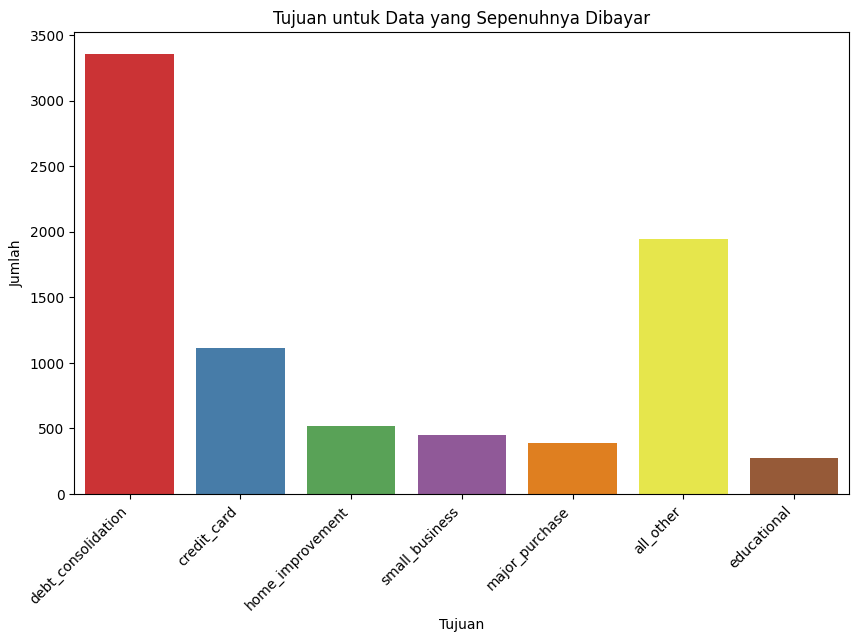

<ipython-input-60-0fc550218ba4>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=not_fully_paid, x='purpose', palette='Set2')


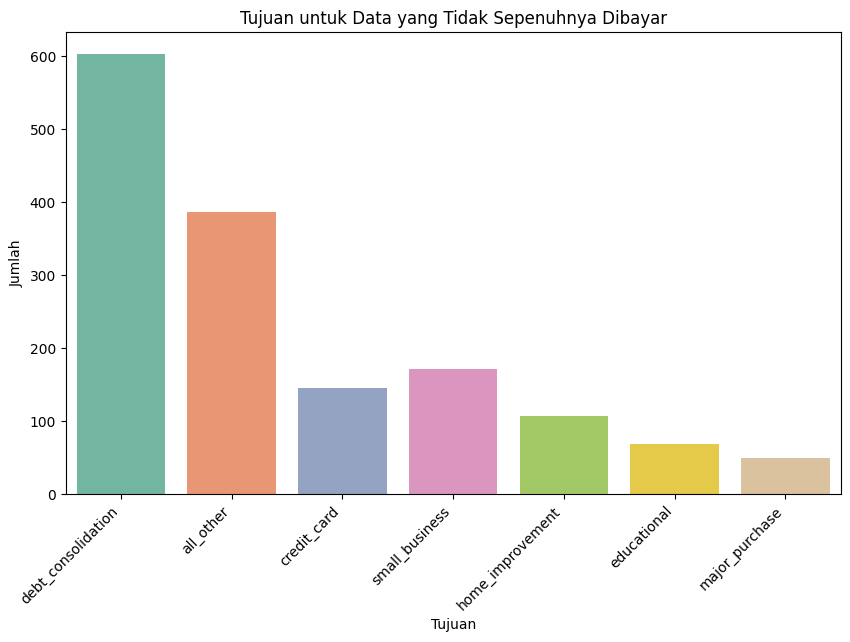

In [60]:
fully_paid = df[df['not.fully.paid'] == 0]
not_fully_paid = df[df['not.fully.paid'] == 1]

import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi tujuan untuk data yang sepenuhnya dibayar
plt.figure(figsize=(10, 6))
sns.countplot(data=fully_paid, x='purpose', palette='Set1')
plt.title('Tujuan untuk Data yang Sepenuhnya Dibayar')
plt.xlabel('Tujuan')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')
plt.show()

# Visualisasi tujuan untuk data yang tidak sepenuhnya dibayar
plt.figure(figsize=(10, 6))
sns.countplot(data=not_fully_paid, x='purpose', palette='Set2')
plt.title('Tujuan untuk Data yang Tidak Sepenuhnya Dibayar')
plt.xlabel('Tujuan')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')
plt.show()


Atas berupa grafik, bawah berupa angka, berdasarkan materi Slide statistika

In [61]:
# Hitung jumlah data yang sepenuhnya dibayar dan tidak sepenuhnya dibayar untuk setiap tujuan
fully_paid_counts = df[df['not.fully.paid'] == 0]['purpose'].value_counts()
not_fully_paid_counts = df[df['not.fully.paid'] == 1]['purpose'].value_counts()

# Gabungkan kedua data menjadi satu dataframe
data_summary = pd.DataFrame({
    'Tujuan': fully_paid_counts.index,
    'Fully Paid': fully_paid_counts.values,
    'Not Fully Paid': not_fully_paid_counts.values
})

print(data_summary)


               Tujuan  Fully Paid  Not Fully Paid
0  debt_consolidation        3354             603
1           all_other        1944             387
2         credit_card        1116             172
3    home_improvement         522             146
4      small_business         447             107
5      major_purchase         388              69
6         educational         274              49


In [64]:

# Tambahkan total data untuk setiap tujuan
data_summary['Total'] = data_summary['Fully Paid'] + data_summary['Not Fully Paid']

# Total jumlah data yang sepenuhnya dibayar
total_fully_paid = data_summary['Fully Paid'].sum()
total_not_fully_paid = data_summary['Not Fully Paid'].sum()


print("Total Fully Paid (Dibayar Penuh):", total_fully_paid)
print("Total Not Fully Paid (Tidak Dibayar Penuh):", total_not_fully_paid)


Total Fully Paid (Dibayar Penuh): 8045
Total Not Fully Paid (Tidak Dibayar Penuh): 1533


# MATERI PERTEMUAN 4 & 5

Setelah mengetahui parameter dibawah ini, saya ingin mengaplikasikan rumus **Atribut tidak saling terkait**

dengan notasi:

$$ P(X|c_i) = \prod_{k=1}^{n}P(x_k | C_i)  $$

Bila $P(X|c_i)$ dapat diketahui melalui perhitungan di atas, maka klas
(label) dari data sampel $X$ adalah klas (label) yang memiliki $P(X|c_i)*P(c_i)$ Maksimum.

In [55]:
print("Hasil Perihtungan: ")
print("")
print("")
#kelas dibayar penuh
fully_paid = 8045
#kelas tidak dibayar penuh
not_fully_paid = 1533

#kelas debt_consolidation
debt_fully_paid = 3354/fully_paid
debt_not_fully_paid = 603 / not_fully_paid
print("(debt_consolidation | fully_paid):", debt_fully_paid, ", (debt_consolidation | not_fully_paid):", debt_not_fully_paid)
print("")
#kelas all_other
all_fully_paid =  1944/fully_paid
all_not_fully_paid = 387/not_fully_paid
print("(all_other | fully_paid):", all_fully_paid, ", (all_other | not_fully_paid):", all_not_fully_paid)
print("")
#kelas credit_card
credit_fully_paid = 1116/fully_paid
credit_not_fully_paid = 172/not_fully_paid
print("(credit_card | fully_paid):", credit_fully_paid, ", (credit_card | not_fully_paid):", credit_not_fully_paid)
print("")
#Kelas home_improvement
home_fully_paid = 522 /fully_paid
home_not_fully_paid = 146/not_fully_paid
print("(home_improvement | fully_paid):", home_fully_paid, ", (home_improvement | not_fully_paid):", home_not_fully_paid)
print("")
#Kelas small_business
sb_fully_paid = 477/fully_paid
sb_not_fully_paid = 107/not_fully_paid
print("(small_business | fully_paid):", sb_fully_paid, ", (small_business | not_fully_paid):", sb_not_fully_paid)
print("")
#Kelas major_purchase
mp_fully_paid = 388 / fully_paid
mp_not_fully_paid = 69/ not_fully_paid
print("(major_purchase | fully_paid):", mp_fully_paid, ", (major_purchase | not_fully_paid):", mp_not_fully_paid)
print("")
#kelas educational
edu_fully_paid = 274 / fully_paid
edu_not_fully_paid = 49 / not_fully_paid
print("(educational | fully_paid):", edu_fully_paid, ", (educational | not_fully_paid):", edu_not_fully_paid)
print("")
#(X | fully_paid/not_fully_paid)
prod_fully_paid = debt_fully_paid * all_fully_paid * credit_fully_paid * home_fully_paid * sb_fully_paid * mp_fully_paid * edu_fully_paid
prod_not_fully_paid = debt_not_fully_paid * all_not_fully_paid * credit_not_fully_paid * home_not_fully_paid * sb_not_fully_paid * mp_not_fully_paid * edu_not_fully_paid
print("")
print("Hasil (X | fully_paid): ", prod_fully_paid, ", Sedangkan (X | not_fully_paid):", prod_not_fully_paid)
print("")


Hasil Perihtungan: 


(debt_consolidation | fully_paid): 0.41690490988191425 , (debt_consolidation | not_fully_paid): 0.3933463796477495

(all_other | fully_paid): 0.24164077066500933 , (all_other | not_fully_paid): 0.25244618395303325

(credit_card | fully_paid): 0.1387197016780609 , (credit_card | not_fully_paid): 0.11219830397912589

(home_improvement | fully_paid): 0.0648850217526414 , (home_improvement | not_fully_paid): 0.09523809523809523

(small_business | fully_paid): 0.059291485394655064 , (small_business | not_fully_paid): 0.06979778212654925

(major_purchase | fully_paid): 0.04822871348663766 , (major_purchase | not_fully_paid): 0.04500978473581213

(educational | fully_paid): 0.03405842137973897 , (educational | not_fully_paid): 0.0319634703196347


Hasil (X | fully_paid):  8.83105002428993e-08 , Sedangkan (X | not_fully_paid): 1.065475442370111e-07



# Kembali Pelajaran Datacamp

Dalam tutorial yang saya dapatkan, saya masih belum mengerti tentang imbalance dataset dikarenakan di website: https://www.datacamp.com/tutorial/naive-bayes-scikit-learn tempat di mana saya mengambil contoh ini, data tsb *imbalance*

Kita akan mengonversi kolom 'purpose' dari kategori menjadi bilangan bulat menggunakan fungsi **get_dummies** dari pandas.








In [12]:
pre_df = pd.get_dummies(df,columns=['purpose'],drop_first=True)
pre_df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


Setelah itu, kita akan mendefinisikan variabel fitur (X) dan target (y), dan membagi dataset menjadi set pelatihan dan pengujian.

In [13]:
from sklearn.model_selection import train_test_split

X = pre_df.drop('not.fully.paid', axis=1)
y = pre_df['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)

***Model building and Training***

Pembangunan dan pelatihan model cukup sederhana. Kita akan melatih sebuah model pada dataset pelatihan menggunakan hiperparameter default.

In [15]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train);

**Model Evaluation**

Kita akan menggunakan akurasi dan skor f1 untuk menentukan kinerja model, dan sepertinya algoritma Gaussian Naive Bayes telah berperforma cukup baik.

In [16]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred = model.predict(X_test)

accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Akurasi:", accuray)
print("F1:", f1)

Akurasi: 0.8206263840556786
F1: 0.8686606980013266


Karena sifat data yang tidak seimbang, kita bisa melihat bahwa matriks kebingungan memberikan cerita yang berbeda. Pada target minoritas: *not fully paid*, kita memiliki lebih banyak pengklasifikasian yang salah.








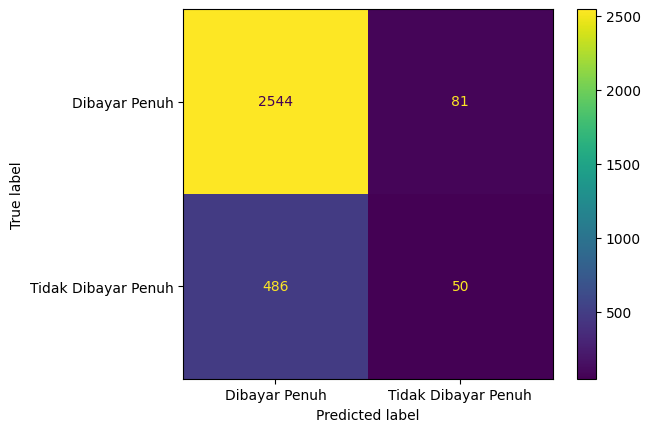

In [19]:
labels = ["Dibayar Penuh", "Tidak Dibayar Penuh"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

# Kesimpulan

Saya telah memahami Implementasi Naive Bayes Classifier di python, dan saya sudah juga sudah mengkalkulasi rumus **Atribut tidak saling terkait** yang dislide 17.

Dari sini kita dapat menyimpulkan kelas **(X | not_fully_paid)** memiliki nilai yang lebih besar **(1.065475442370111e-07)**


**REFERENSI**

[1] https://www.datacamp.com/tutorial/naive-bayes-scikit-learn

[2] Slide pert 4 & 5 (Hal 17)

[3]  ChatGPT

[4] https://www.kaggle.com/datasets/itssuru/loan-data

